# Inject the Data

In [2]:
import pandas as pd
price_data =pd.read_csv("data/train.csv")

In [3]:
price_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


There seems to be no NULL values in the dataset

In [5]:
price_data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [6]:
price_data[["cut", "color", "clarity"]].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [7]:
price_data["cut"].value_counts() 
# Cut column is ordinal categorical values
# Least value - Fair
# Best value - Premium

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [8]:
price_data["color"].value_counts() 
# Its ordinal categorical values
# low -> Z highest -> D

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

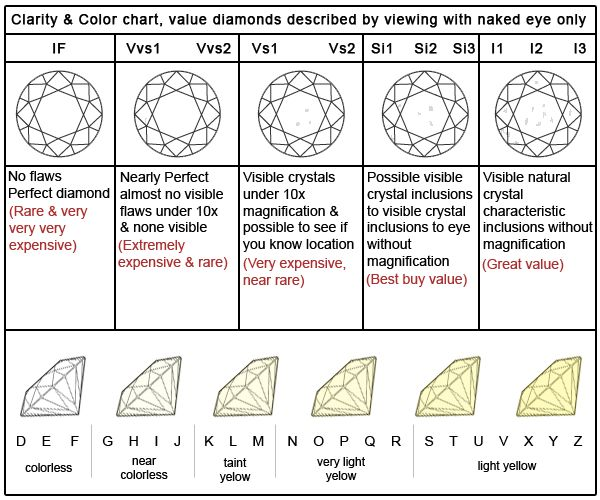

In [9]:
price_data["clarity"].value_counts()
# Ordinal column
# Least value - I3
# Best Value - IF

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [10]:
price_data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
diamond_data = price_data.drop("id", axis=1)

In [12]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [14]:
diamond_data.duplicated().sum()

0

In [15]:
diamond_data[diamond_data.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [16]:
diamond_data.shape

(193573, 10)

In [17]:
numerical_features = [col for col in diamond_data.columns if diamond_data[col].dtype != "O"]
categorical_features = [col for col in diamond_data.columns if diamond_data[col].dtype == "O"]

In [18]:
categorical_features

['cut', 'color', 'clarity']

In [19]:
numerical_features

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [20]:
diamond_data.shape[-1]

10

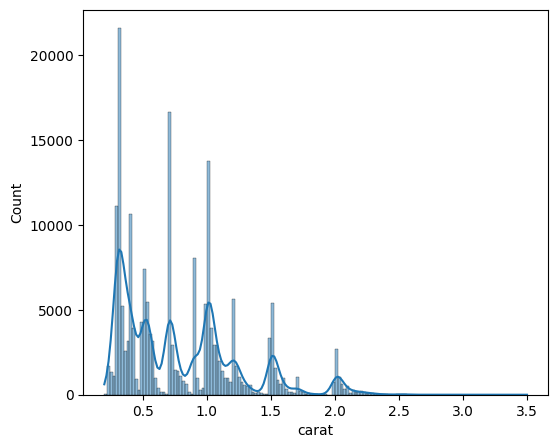

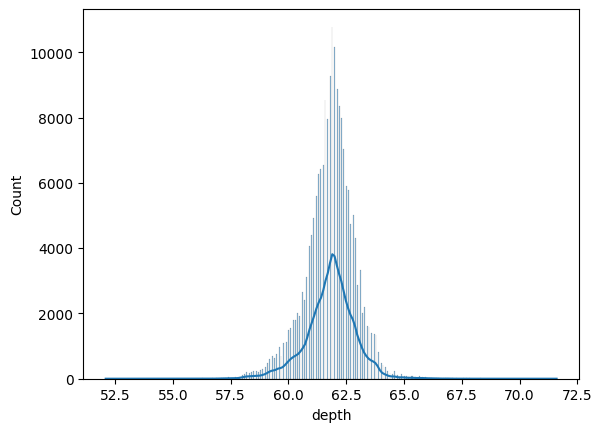

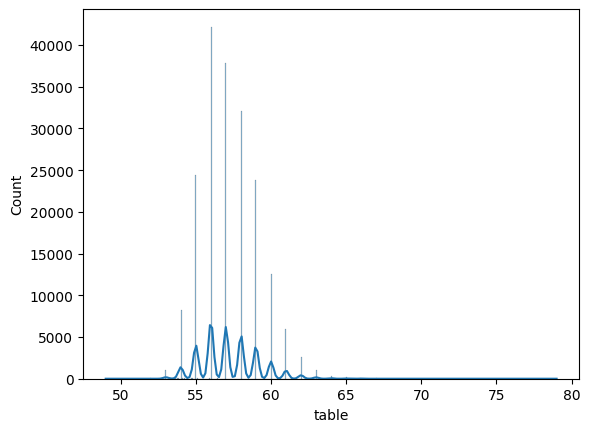

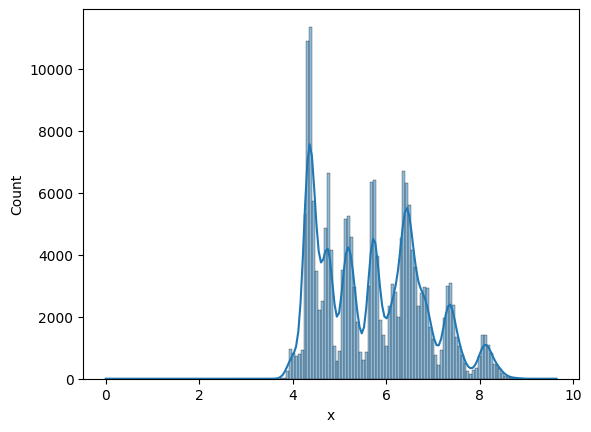

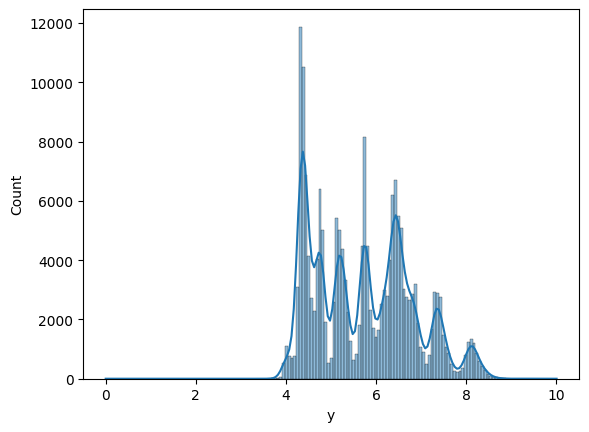

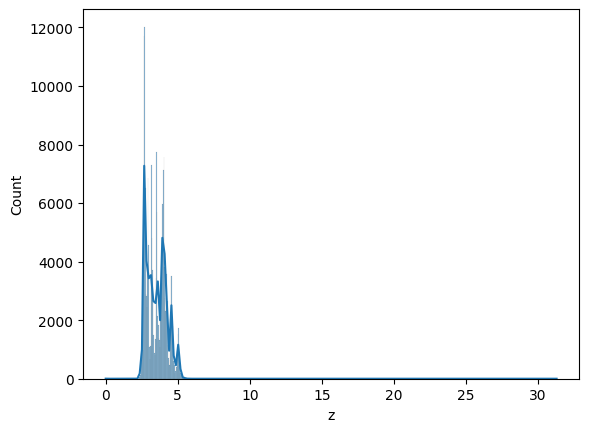

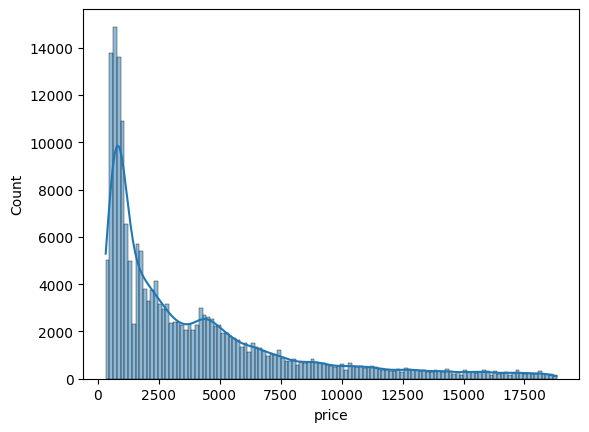

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
for col in numerical_features:
    sns.histplot(data=diamond_data, x=col, kde=True)
    plt.show()

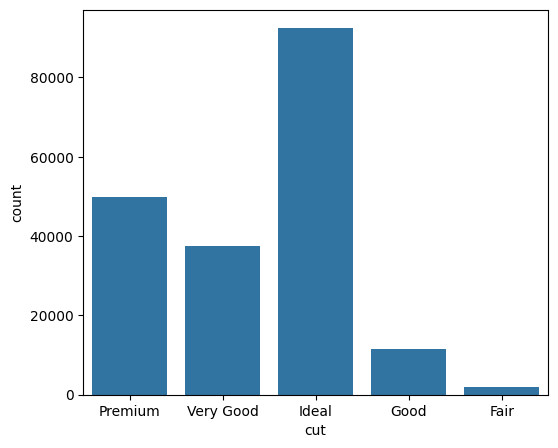

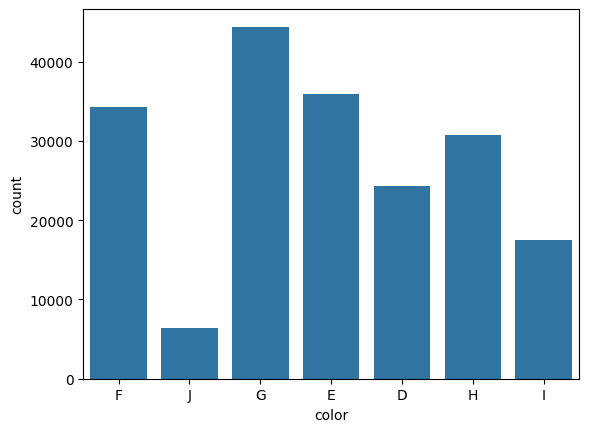

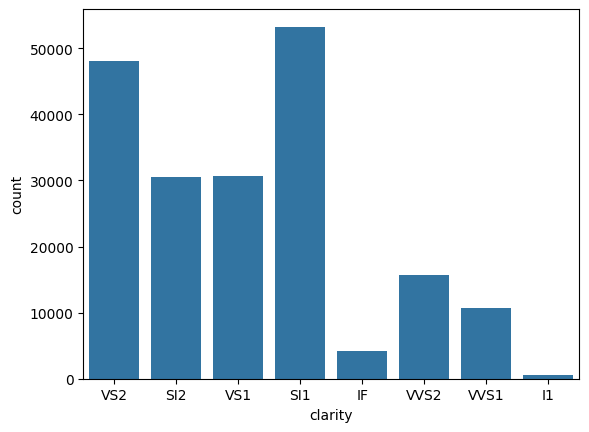

In [22]:
plt.figure(figsize=(6,5))
for col in categorical_features:
    sns.countplot(data=diamond_data, x=col)
    plt.show()

<Axes: >

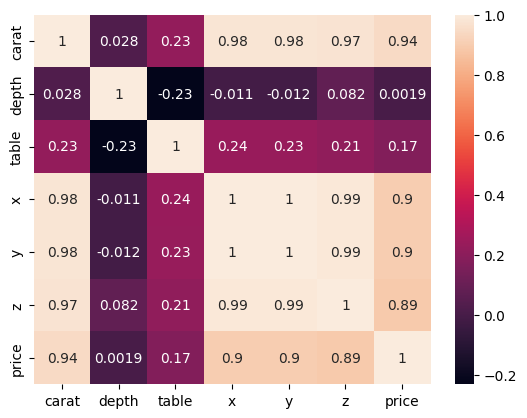

In [23]:
sns.heatmap(diamond_data[numerical_features].corr(), annot=True)

##### 1. Carat is directly correlated to X,Y,Z , as the carat(weight increases X,YZ values will also have to increase)
##### 2. Carat and price are also correlated carat increases the price also increases

# Feature Engineering

In [24]:
# perform encoding for categorical values
print(diamond_data["cut"].unique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']


In [25]:
print(diamond_data["color"].unique())

['F' 'J' 'G' 'E' 'D' 'H' 'I']


In [26]:
print(diamond_data["clarity"].unique())

['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [45]:
import string
order_color = [_ for _ in string.ascii_uppercase[3:][::-1]]
order_color

['Z',
 'Y',
 'X',
 'W',
 'V',
 'U',
 'T',
 'S',
 'R',
 'Q',
 'P',
 'O',
 'N',
 'M',
 'L',
 'K',
 'J',
 'I',
 'H',
 'G',
 'F',
 'E',
 'D']

In [28]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
encoder = OrdinalEncoder(categories=[
    ["Fair", "Ideal", "Good", "Very Good", "Premium"],
    ["D", "E", "F", "G", "H", "I", "J"], 
    ["I3", "I2", "I1", "SI3", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]],
    dtype=np.int8)

In [29]:
encoded_data = encoder.fit_transform(diamond_data[["cut", "color", "clarity"]])

In [30]:
encoded_data = pd.DataFrame(encoded_data, columns=["cut", "color", "clarity"])

In [31]:
diamond_data.cut = encoded_data.cut
diamond_data.color = encoded_data.color
diamond_data.clarity = encoded_data.clarity

In [32]:
diamond_data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,2,6,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,6,4,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,3,7,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,3,7,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,3,6,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,1,0,8,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,3,8,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,2,5,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,0,5,62.9,55.0,4.45,4.49,2.81,681


<Axes: >

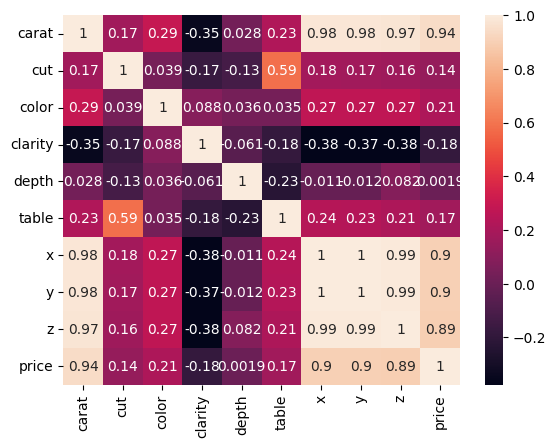

In [33]:
sns.heatmap(diamond_data.corr(), annot=True)

In [36]:
from scipy.stats import pearsonr, spearmanr

In [35]:
print(pearsonr(diamond_data["depth"], diamond_data["price"]))

PearsonRResult(statistic=0.0018795114349713154, pvalue=0.4082808462090894)


In [37]:
print(spearmanr(diamond_data["depth"], diamond_data["price"]))

SignificanceResult(statistic=0.030421658977621314, pvalue=7.14444178678168e-41)


In [38]:
print(pearsonr(diamond_data["table"], diamond_data["price"]))

PearsonRResult(statistic=0.17491538202810988, pvalue=0.0)


In [39]:
print(pearsonr(diamond_data["clarity"], diamond_data["price"]))

PearsonRResult(statistic=-0.18350605504505713, pvalue=0.0)


In [40]:
print(pearsonr(diamond_data["color"], diamond_data["price"]))

PearsonRResult(statistic=0.2108591486752602, pvalue=0.0)


In [41]:
print(pearsonr(diamond_data["carat"], diamond_data["x"]))

PearsonRResult(statistic=0.9805629356725084, pvalue=0.0)


In [42]:
print(pearsonr(diamond_data["carat"], diamond_data["y"]))

PearsonRResult(statistic=0.9801609651889192, pvalue=0.0)


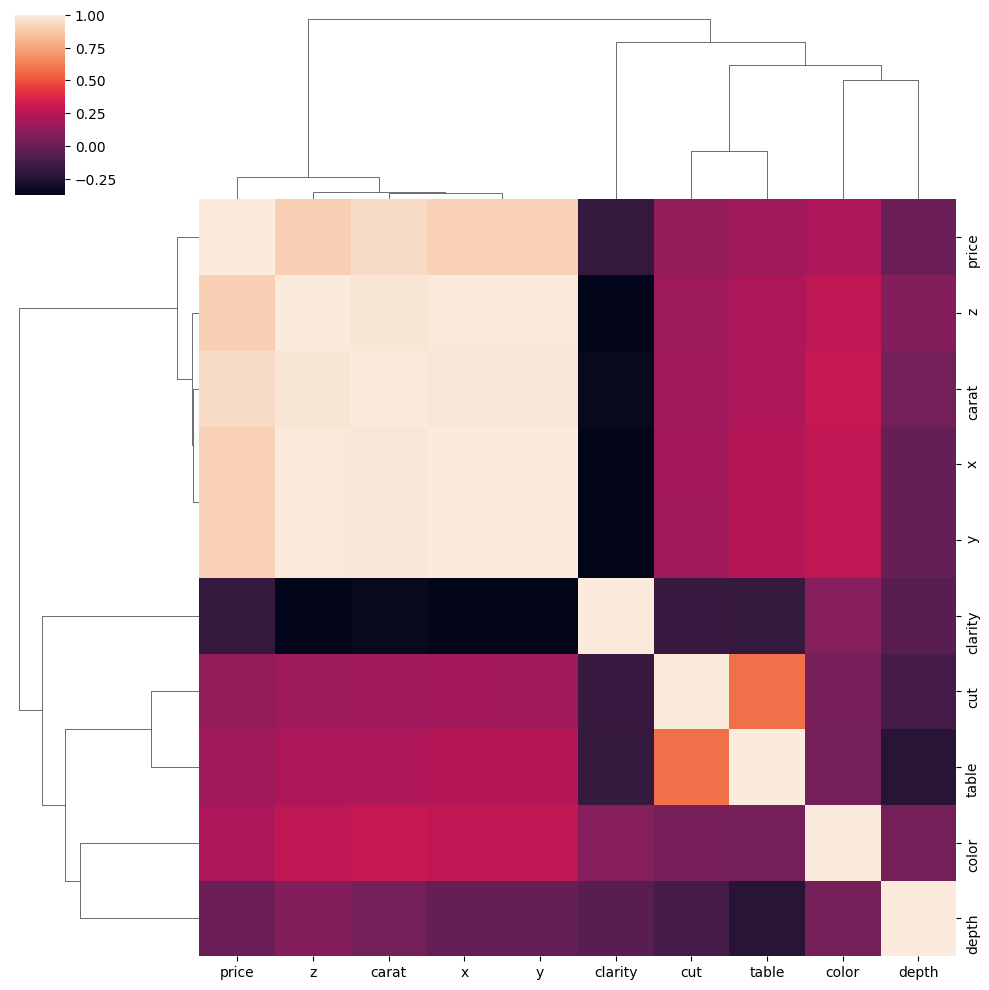

In [43]:
sns.clustermap(diamond_data.corr())